# Principal Component Analysis with Cancer Data

In [251]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [252]:
dataframe = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [253]:
dataframe.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [254]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [255]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [256]:
dataframe.shape

(699, 11)

In [257]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [258]:
# We could see "?" values in column, this should be removed from data set
countQuestionmark = (dataframe['Bare Nuclei']=='?').sum()
# Check for missing value in any other column


In [259]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
print("Total Number of Question Marks in Bare Nuclei feature :",countQuestionmark)
dataframe.isnull().sum()
dataframe.isna().sum()

Total Number of Question Marks in Bare Nuclei feature : 16


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [260]:
top = dataframe['Bare Nuclei'].describe().top
top = int(top)
print(top)
dataframe = dataframe.replace('?',top)
dataframe['Bare Nuclei'] = dataframe['Bare Nuclei'].astype('int64')

#print(dataframe)
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp.fit(dataframe['Bare Nuclei'])
#SimpleImputer()
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values (say top value)

1


In [261]:
#finding duplicates
dataframe.duplicated(subset=None, keep='first').value_counts()

False    690
True       9
dtype: int64

In [262]:
#dropping the duplicate values
dataframe.drop_duplicates(keep='first', inplace=True)


In [263]:
for feature in dataframe.columns: # Loop through all columns in the dataframe
    if dataframe[feature].dtype == 'object': # Only apply for columns with categorical strings
        dataframe[feature] = pd.Categorical(dataframe[feature]).codes # Replace strings with an integer
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 11 columns):
ID                             690 non-null int64
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(11)
memory usage: 64.7 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [264]:
# Check for correlation of variable

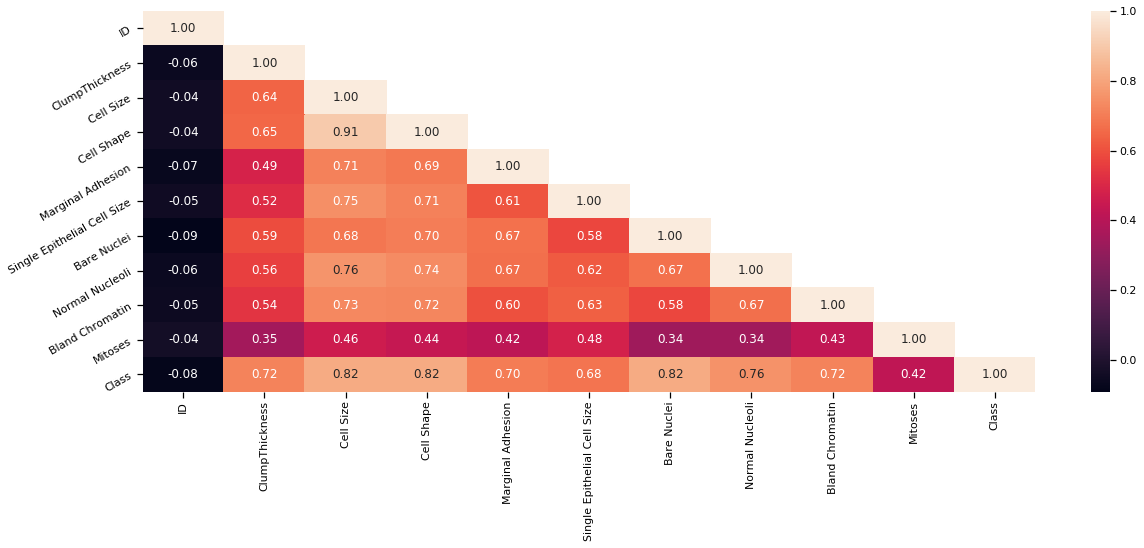

In [265]:
corr = dataframe.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [266]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [267]:
#Let us check for pair plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


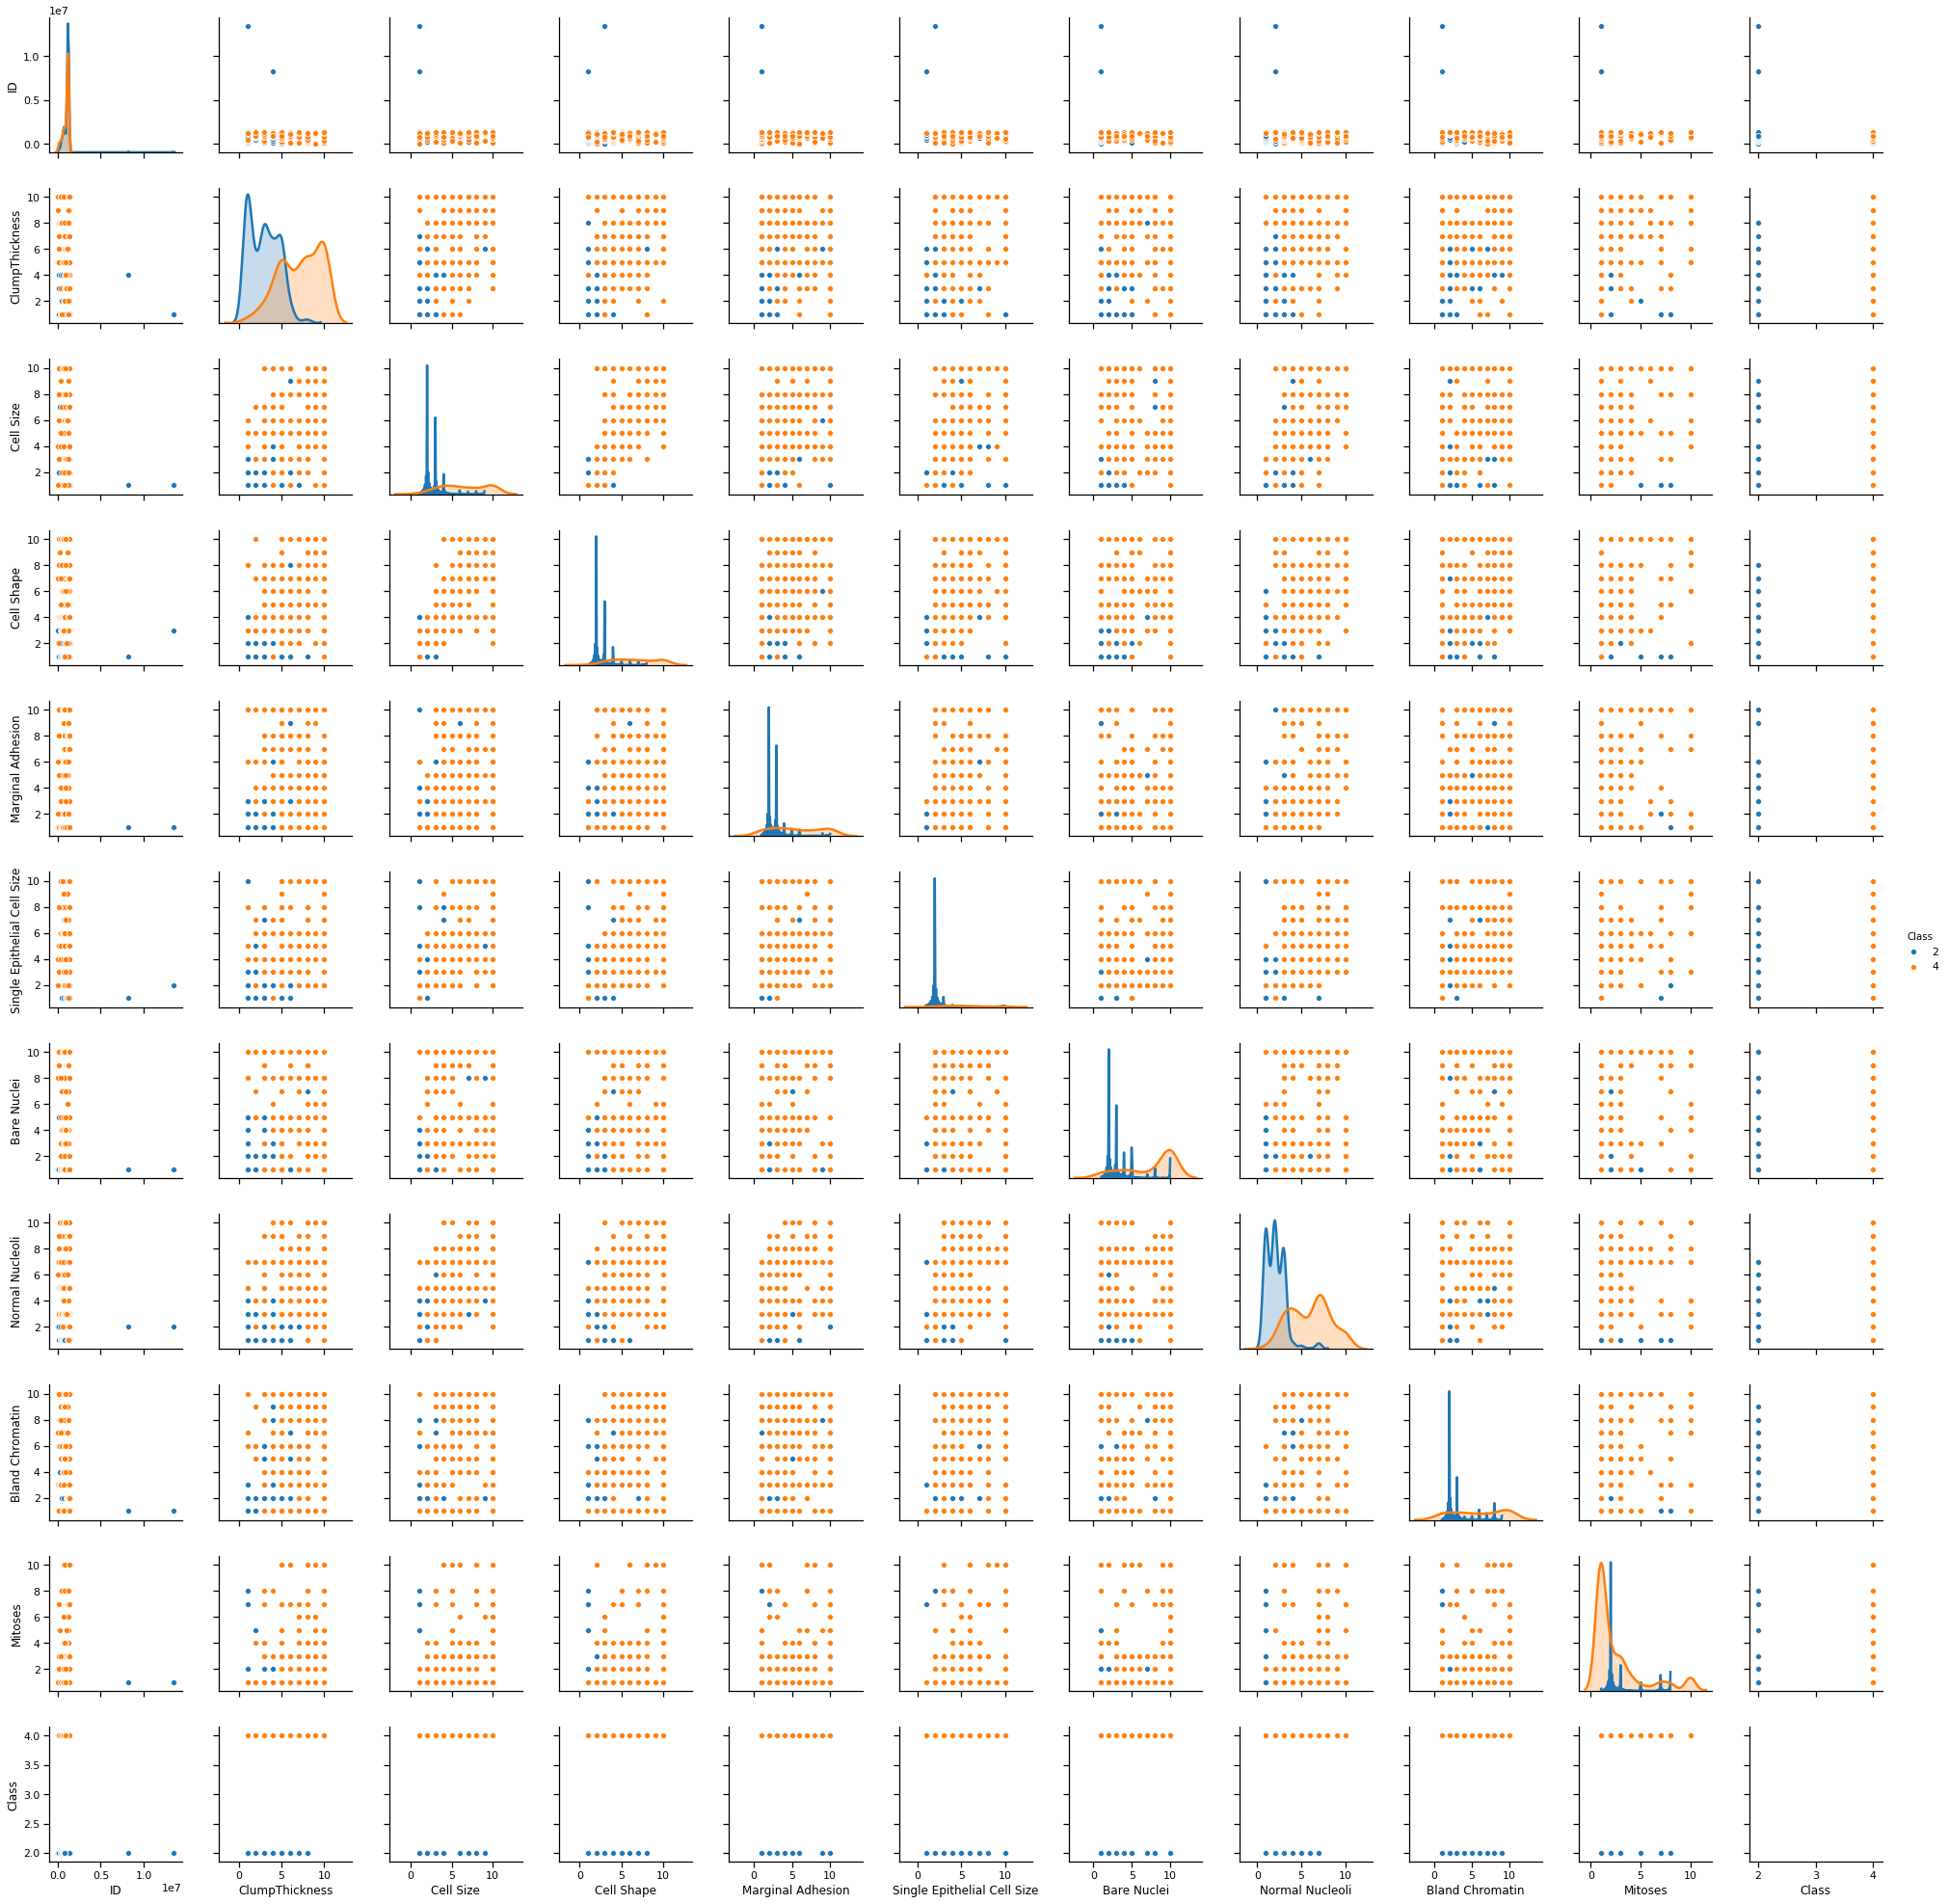

In [268]:
import seaborn as sns
sns.pairplot(dataframe,diag_kind='kde',hue='Class')

In [269]:
# Relationship between variables shows some correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [270]:
# We could see most of the outliers are now removed.
dataframe.drop(['ID'], axis = 1, inplace= True )

In [271]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 690 non-null int64
Cell Size                      690 non-null int64
Cell Shape                     690 non-null int64
Marginal Adhesion              690 non-null int64
Single Epithelial Cell Size    690 non-null int64
Bare Nuclei                    690 non-null int64
Normal Nucleoli                690 non-null int64
Bland Chromatin                690 non-null int64
Mitoses                        690 non-null int64
Class                          690 non-null int64
dtypes: int64(10)
memory usage: 79.3 KB


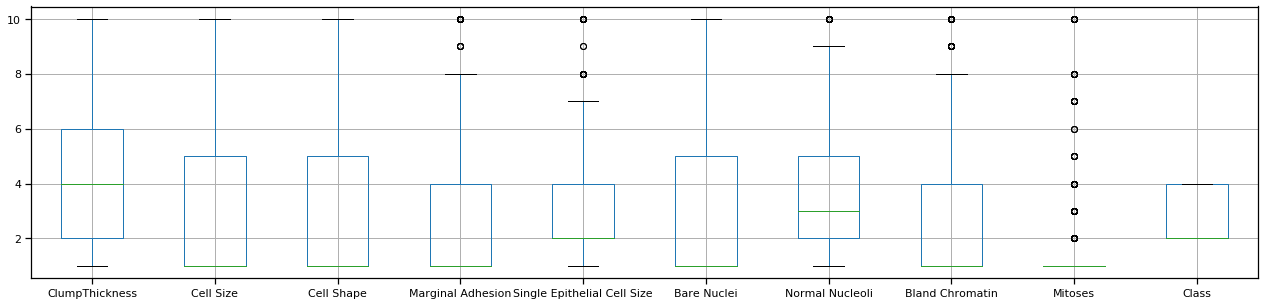

In [272]:
dataframe.boxplot(figsize=(22,5),column=list(dataframe.columns))

In [273]:
pd.crosstab(dataframe["Marginal Adhesion"],dataframe["Class"])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [274]:
dataframe['Marginal Adhesion'] = np.where(dataframe['Marginal Adhesion']>4,4,dataframe['Marginal Adhesion'])

In [275]:
dataframe['Single Epithelial Cell Size'] = np.where(dataframe['Single Epithelial Cell Size']>4,4,dataframe['Single Epithelial Cell Size'])

In [276]:
dataframe['Normal Nucleoli'] = np.where(dataframe['Normal Nucleoli']>5,5,dataframe['Normal Nucleoli'])

In [277]:
dataframe['Bland Chromatin'] = np.where(dataframe['Bland Chromatin']>4,4,dataframe['Bland Chromatin'])

In [278]:
dataframe['Mitoses'] = np.where(dataframe['Mitoses']>1,1,dataframe['Mitoses'])

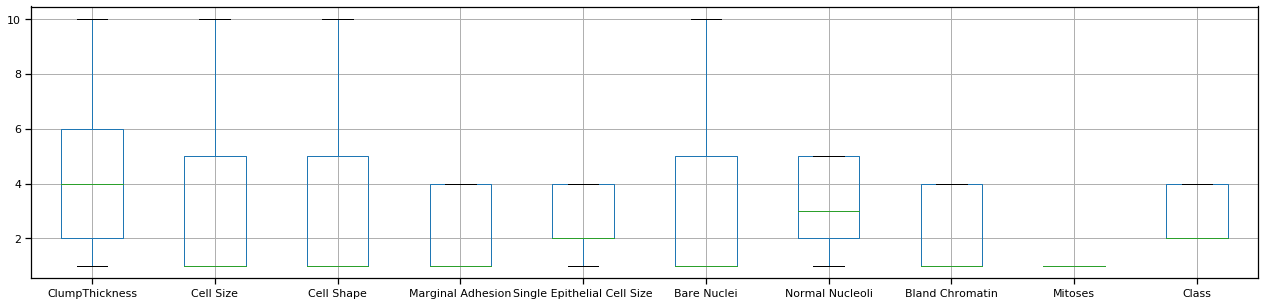

In [279]:
dataframe.boxplot(figsize=(22,5),column=list(dataframe.columns))

In [280]:
dataframe.drop(['Class'], axis = 1, inplace= True )

# Q6 Create a covariance matrix for identifying Principal components

In [281]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(dataframe.T)
print(cov_matrix)

[[ 7.93762016  5.51311079  5.45212343  2.02134999  1.58362256  6.01908248
   2.38880966  2.10597589  0.        ]
 [ 5.51311079  9.25650701  8.15558781  2.84857281  2.26463474  7.53352685
   3.21412675  2.88911466  0.        ]
 [ 5.45212343  8.15558781  8.76659936  2.70385562  2.13964788  7.54129488
   3.06406891  2.78168739  0.        ]
 [ 2.02134999  2.84857281  2.70385562  1.68629183  0.86946005  3.26875749
   1.24404198  1.10828548  0.        ]
 [ 1.58362256  2.26463474  2.13964788  0.86946005  0.92942933  2.3775478
   0.95927726  0.91140279  0.        ]
 [ 6.01908248  7.53352685  7.54129488  3.26875749  2.3775478  13.08315139
   3.66926863  3.03232158  0.        ]
 [ 2.38880966  3.21412675  3.06406891  1.24404198  0.95927726  3.66926863
   2.17119749  1.32248375  0.        ]
 [ 2.10597589  2.88911466  2.78168739  1.10828548  0.91140279  3.03232158
   1.32248375  1.71181927  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.  

# Q7 Identify eigen values and eigen vector

In [282]:
# Step 2- Get eigen values and eigen vector

In [283]:
from numpy import linalg as LA
eigval,eigenvec=LA.eig(cov_matrix)
print(eigval)

[34.2626745   4.39070658  3.56237258  1.03556268  0.27301515  0.8112712
  0.56250457  0.64450858  0.        ]


In [284]:
print(eigenvec)

[[-0.37443397  0.30905166 -0.87249075  0.0385494   0.00526637  0.03841232
  -0.00730831  0.00185931  0.        ]
 [-0.47656232  0.37237134  0.36111587 -0.11413009  0.08553758  0.67118285
   0.08047597  0.16284383  0.        ]
 [-0.46636789  0.31740989  0.31021115  0.50091273  0.00208764 -0.57130242
  -0.08482426 -0.03196033  0.        ]
 [-0.17536063 -0.0280308   0.05843051 -0.29323805  0.13633055  0.0336041
  -0.62307736 -0.68638152  0.        ]
 [-0.13401339  0.02086571  0.04976869 -0.1732363  -0.95483501 -0.01245551
   0.09712198 -0.16679204  0.        ]
 [-0.54383624 -0.81360129 -0.04415937  0.15585844  0.02451413  0.09202021
   0.06595979  0.05132088  0.        ]
 [-0.20032309 -0.01793073  0.0392585  -0.63266984  0.01830485 -0.36838594
  -0.29469494  0.57866088  0.        ]
 [-0.17490115  0.03984903  0.05236349 -0.44046834  0.24782919 -0.27602777
   0.70528092 -0.36882996  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          1.  

# Q8 Find variance and cumulative variance by each eigen vector

In [285]:
tot = sum(eigval)
var_exp = [( i /tot ) * 100 for i in sorted(eigval, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 75.23211801  84.87299283  92.69505687  94.96888911  96.75023431
  98.16541123  99.40052817 100.         100.        ]


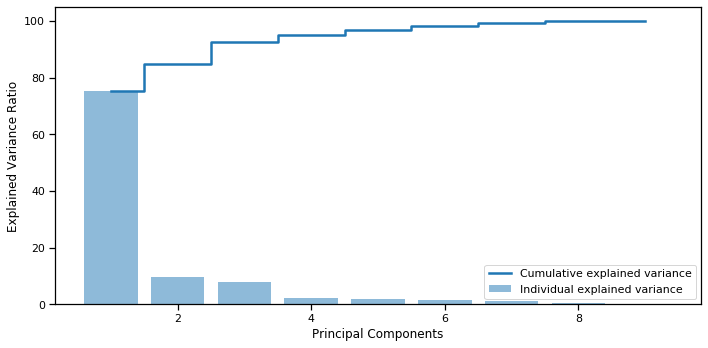

In [286]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigval.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigval.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [287]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(dataframe)
cancer_pca = pca.transform(dataframe)

In [288]:
cancer_pca.shape

(690, 2)

In [289]:
print(pca.components_)

[[ 0.37443397  0.47656232  0.46636789  0.17536063  0.13401339  0.54383624
   0.20032309  0.17490115 -0.        ]
 [ 0.30905166  0.37237134  0.31740989 -0.0280308   0.02086571 -0.81360129
  -0.01793073  0.03984903  0.        ]]


# Q10 Find correlation between components and features

In [290]:
df_comp = pd.DataFrame(pca.components_,columns=list(dataframe))

In [291]:
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.374434,0.476562,0.466368,0.175361,0.134013,0.543836,0.200323,0.174901,-0.0
1,0.309052,0.372371,0.317410,-0.028031,0.020866,-0.813601,-0.017931,0.039849,0.0


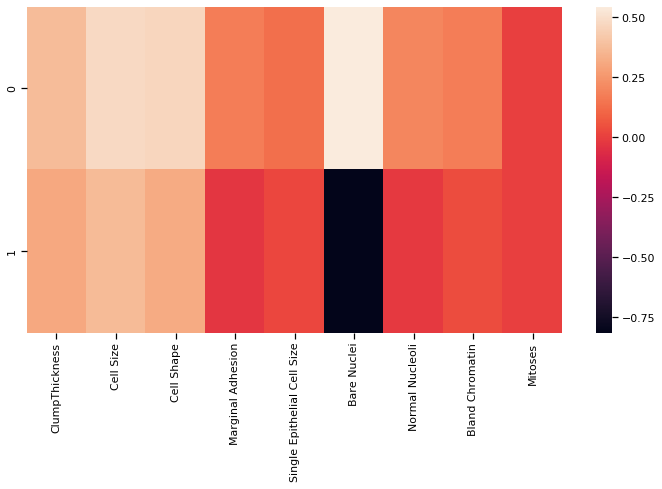

In [292]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [326]:
jokes_df = pd.read_csv('jokes.csv')

In [327]:
jokes_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NumJokes,24983.0,72.467478,21.859600,36.00,53.000,72.00,100.00,100.0
Joke1,24983.0,34.401435,46.707059,-9.95,-0.150,5.05,99.00,99.0
Joke2,24983.0,27.094089,44.228006,-9.95,-2.180,3.69,99.00,99.0
Joke3,24983.0,33.263717,46.747535,-9.95,-1.145,4.66,99.00,99.0
Joke4,24983.0,36.244936,48.812967,-9.95,-3.350,3.45,99.00,99.0
Joke5,24983.0,0.427236,5.472657,-9.95,-3.690,1.12,4.47,99.0
Joke6,24983.0,19.342119,37.860770,-9.95,-0.390,3.54,8.01,99.0
Joke7,24983.0,-0.401803,5.741616,-9.95,-5.290,-0.05,3.93,99.0
Joke8,24983.0,-0.616110,5.008894,-9.95,-4.610,-0.29,3.06,99.0
Joke9,24983.0,36.228421,48.228364,-9.95,-1.775,4.03,99.00,99.0


In [332]:
jokes_df.drop(['NumJokes'],axis = 1).head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [347]:
ratings = jokes_df.iloc[0:200,1:]

In [348]:
ratings.shape


(200, 100)

In [349]:
ratings.head()


,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [350]:
ratings.replace(99.00,0, inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [353]:
ratings_diff = ratings.mean()

In [354]:
print("Top 10 popular jokes")
ratings_diff.sort_values(ascending=False).head(10)

Top 10 popular jokes


Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64